In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from dataclasses import dataclass
import os
from pathlib import Path
import sys
from typing import List

from loguru import logger
import matplotlib.pyplot as plt

# Add src/ to path
root_dir = (Path() / ".." / "..").resolve()
training_dir = str(root_dir / "training")
cache_path = str(root_dir / "solutions.db")
solver_path = "/home/advait/connect4/c4solver"
book_path = "/home/advait/connect4/7x6.book"
sys.path.append(str(root_dir / "src"))

# Enable rust logging
os.environ["RUST_LOG"] = "DEBUG"

In [10]:
# Import must happen after modifying python path
from c4a0.training import TrainingGen

In [11]:
@dataclass
class GenStats:
    gen_numbers: List[int]
    gens: List[TrainingGen]
    set_sizes: List[int]
    policy_scores: List[float]

def gen_stats(training_dir: str) -> GenStats:
    gens = TrainingGen.load_all(training_dir)
    gen_numbers = list(reversed(range(len(gens))))
    gens.pop(-1)  # Zeroth gen is untrained
    gen_numbers.pop(-1)
    logger.info(f"Computing stats for: {training_dir}")
    set_sizes = [
        gen.get_games(str(training_dir)).unique_positions() # type: ignore
        for gen in gens
    ]
    policy_scores = [
        gen.get_games(training_dir).score_policies(solver_path, book_path, cache_path)  # type: ignore
        for gen in gens
    ]
    logger.info("Done")
    return GenStats(gen_numbers, gens, set_sizes, policy_scores)


In [18]:
def plot_single_run(s: GenStats):
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Bar plot for set_sizes
    ax1.bar(s.gen_numbers, s.set_sizes, color='lavender', edgecolor='black')
    ax1.set_ylabel('Unique training positions in generation', fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xlabel('Generation Number', fontsize=14)
    ax1.set_xticks(s.gen_numbers)
    ax1.set_xticklabels(s.gen_numbers, ha='right', fontsize=12)

    # Create a second y-axis for policy_scores
    ax2 = ax1.twinx()
    ax2.plot(s.gen_numbers, s.policy_scores, color='forestgreen', marker='o', linestyle='-', linewidth=2, markersize=6)
    ax2.set_ylabel('% Perfect Moves')

    # Add data labels on line plot
    for i, txt in enumerate(s.policy_scores):
        ax2.annotate(f'{txt:.2f}', (s.gen_numbers[i], s.policy_scores[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

    plt.title('Generation Performance', fontsize=20)
    fig.tight_layout()
    plt.show()
    return plt

def plot_multiple_runs(stats_list: List[GenStats]):
    fig, ax = plt.subplots(figsize=(12, 8))

    for s in stats_list:
        ax.plot(s.gen_numbers, s.policy_scores, marker='o', linestyle='-', linewidth=2, markersize=6, label=f'Run {stats_list.index(s) + 1}')

    ax.set_ylabel('% Perfect Moves', fontsize=14)
    ax.set_xlabel('Generation Number', fontsize=14)
    ax.set_xticks(stats_list[0].gen_numbers)
    ax.set_xticklabels(stats_list[0].gen_numbers, ha='right', fontsize=12)
    ax.legend(title='Runs', fontsize=12)

    plt.title('Generation Performance Across Multiple Runs', fontsize=20)
    fig.tight_layout()
    plt.show()
    return plt

def plot_single_dir(training_dir: str):
    s = gen_stats(training_dir)
    return plot_single_run(s)

def plot_multiple_dirs(dirs: List[str]):
    stats_list = [gen_stats(d) for d in dirs]
    return plot_multiple_runs(stats_list)

2024-08-27 09:54:22.414 | INFO     | __main__:gen_stats:13 - Computing stats for: /home/advait/c4a0/training-sweeps/trial_1


[2024-08-27T16:54:22Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:54:22Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:54:23Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:54:23Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:54:23Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:54:23Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:54:24Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:54:24Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:54:24Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:54:24Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:54:24Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:54:24Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:54:25Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:54:25Z DEBUG c4a

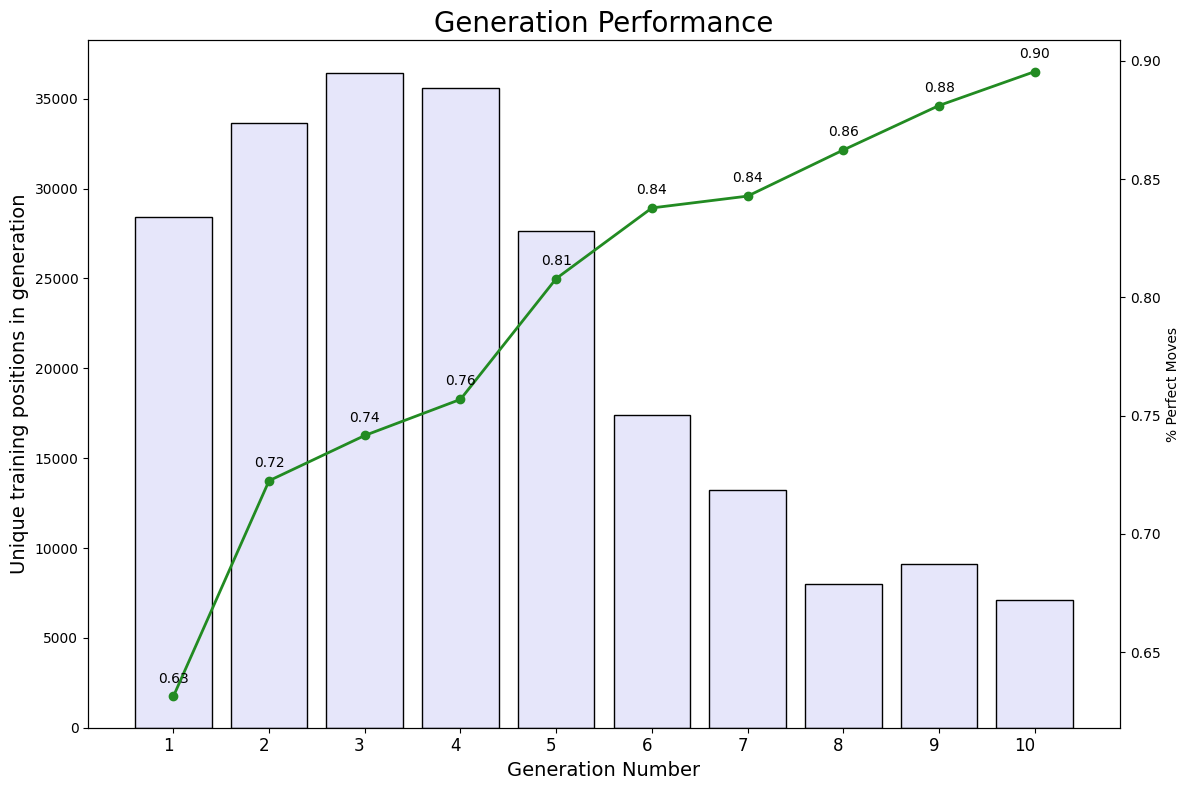

<module 'matplotlib.pyplot' from '/home/advait/c4a0/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [16]:
plot_single_dir(str(root_dir / "training-sweeps" / "trial_1"))

2024-08-27 09:56:22.297 | INFO     | __main__:gen_stats:13 - Computing stats for: /home/advait/c4a0/training-sweeps/trial_0


[2024-08-27T16:56:23Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:56:23Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:56:23Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:56:23Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:56:24Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:56:24Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:56:25Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:56:25Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:56:26Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:56:26Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:56:27Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:56:27Z DEBUG c4a0_rust::solver] Finished solving positions
[2024-08-27T16:56:28Z DEBUG c4a0_rust::solver] Solving 0 missing positions
[2024-08-27T16:56:28Z DEBUG c4a

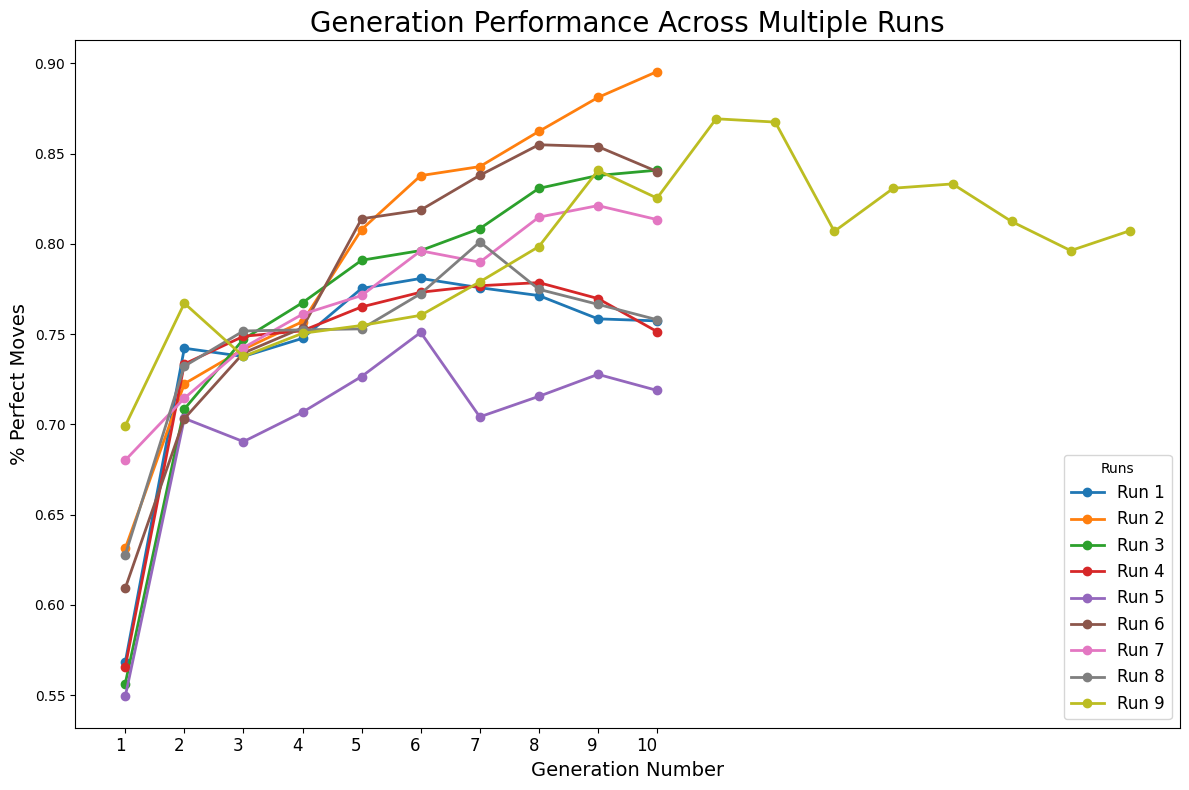

<module 'matplotlib.pyplot' from '/home/advait/c4a0/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [19]:
plot_multiple_dirs([str(root_dir / "training-sweeps" / f"trial_{i}") for i in range(8)])